In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("instagram_reach.csv")

In [3]:
df.head(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [7]:
len(df['Caption'].unique())

95

In [8]:
df['Caption'].fillna('No caption', inplace=True)

In [9]:
df.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [10]:
df.drop(columns=["Unnamed: 0","S.No"],inplace=True)

In [11]:
df.rename(columns={"Time since posted" : "Time_since_posted"},inplace=True)

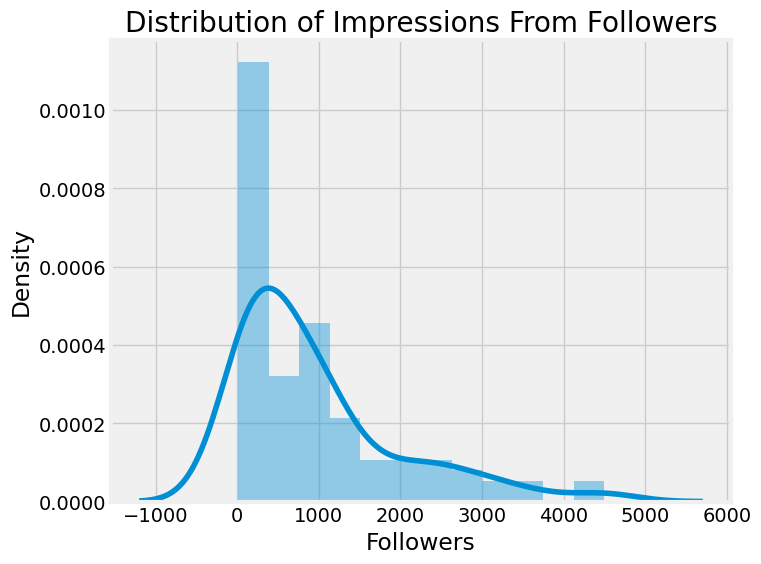

In [12]:
## Distribution of Impressions From Followers

plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sb.distplot(df['Followers'])
plt.show()

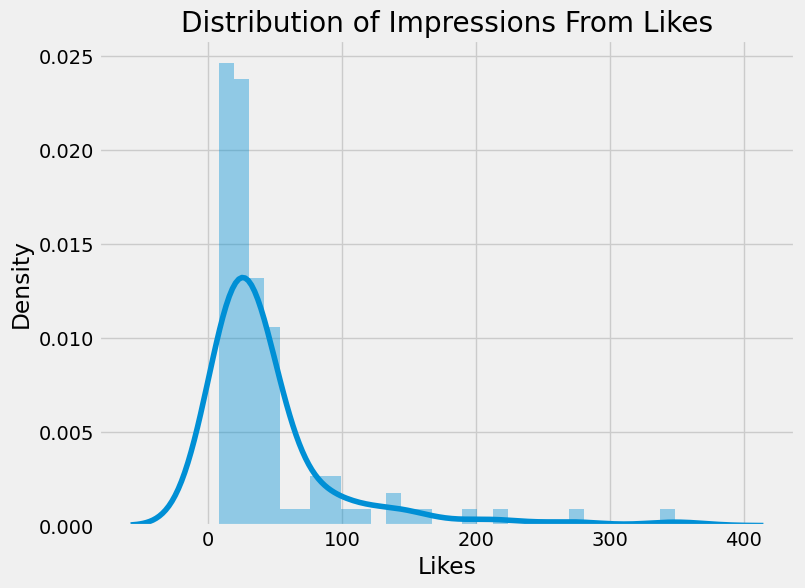

In [13]:
## Distribution of Impressions From Likes

plt.figure(figsize=(8, 6))
plt.title("Distribution of Impressions From Likes")
sb.distplot(df['Likes'])
plt.show()

In [14]:
## Relation between Likes and Followers
import plotly.express as px

followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

colors = ['#FFA500', '#00FF00']

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0, color_discrete_sequence=colors)
fig.show()

In [15]:
## Plotting Scatter-plot for showing Relationship Between Likes and Followers 

figure = px.scatter(data_frame = df, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [16]:
X = df[["USERNAME","Caption","Followers","Hashtags"]]
y_like = df['Likes']
y_time = df['Time_since_posted']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_like_train, Y_like_test, Y_time_train, Y_time_test = train_test_split(X,y_like,y_time,random_state=42,test_size=0.2)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variables
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()


for col in X_train.columns:
    X_train_encoded[col] = label_encoder.fit_transform(X_train[col])
    

for col in X_test.columns:
    X_test_encoded[col] = label_encoder.fit_transform(X_test[col])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, Y_like_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(Y_like_test, likes_predictions) 
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 3599.7175603452442


In [21]:
# Preprocess the time since posted variable
import re
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [22]:
Y_time_train = Y_time_train.apply(extract_numerical_value)
Y_time_test = Y_time_test.apply(extract_numerical_value)

In [23]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, Y_time_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(Y_time_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 15.636530088520383
